# FLIGHT PRICE PREDICTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load datasets
train=pd.read_csv("Data_Train.csv")
test=pd.read_csv("Test_set.csv")

In [7]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [9]:
print('Train_data:',train.shape)
print('Test_data:',test.shape)

Train_data: (10683, 11)
Test_data: (2671, 10)


In [10]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [12]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [14]:
#combining train and test datasets into single dataframe
train['source']='train'
test['source']='test'
flight=pd.concat([train,test],ignore_index=True)

In [15]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [52]:
flight.shape

(13354, 12)

In [16]:
flight.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

flight['Airline']=le.fit_transform(flight['Airline'])
flight['Date_of_Journey']=le.fit_transform(flight['Date_of_Journey'])
flight['Source']=le.fit_transform(flight['Source'])
flight['Destination']=le.fit_transform(flight['Destination'])
flight['Route']=le.fit_transform(flight['Route'])
flight['Dep_Time']=le.fit_transform(flight['Dep_Time'])
flight['Arrival_Time']=le.fit_transform(flight['Arrival_Time'])
flight['Duration']=le.fit_transform(flight['Duration'])
flight['Total_Stops']=le.fit_transform(flight['Total_Stops'])
flight['Additional_Info']=le.fit_transform(flight['Additional_Info'])

flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,train
1,1,6,3,0,87,31,986,342,1,8,7662.0,train
2,4,43,2,1,122,70,468,106,1,8,13882.0,train
3,3,10,3,0,95,164,1430,317,0,8,6218.0,train
4,3,0,0,5,29,149,1331,309,0,8,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,190,1283,168,0,8,NaN,test
13350,3,28,3,0,67,122,1097,239,4,8,NaN,test
13351,4,36,2,1,108,205,464,332,0,8,NaN,test
13352,1,36,2,1,108,16,1212,62,0,8,NaN,test


In [32]:
flight.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

# Filling NaN values

In [33]:
import numpy as np
flight=flight.replace(np.NaN,flight['Price'].mean())

In [34]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,211,264,242,4,8,3897.000000,train
1,1,6,3,0,87,31,986,342,1,8,7662.000000,train
2,4,43,2,1,122,70,468,106,1,8,13882.000000,train
3,3,10,3,0,95,164,1430,317,0,8,6218.000000,train
4,3,0,0,5,29,149,1331,309,0,8,13302.000000,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,190,1283,168,0,8,9087.064121,test
13350,3,28,3,0,67,122,1097,239,4,8,9087.064121,test
13351,4,36,2,1,108,205,464,332,0,8,9087.064121,test
13352,1,36,2,1,108,16,1212,62,0,8,9087.064121,test


In [35]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
source             0
dtype: int64

# EDA:

Visualization:

<AxesSubplot:xlabel='Airline', ylabel='count'>

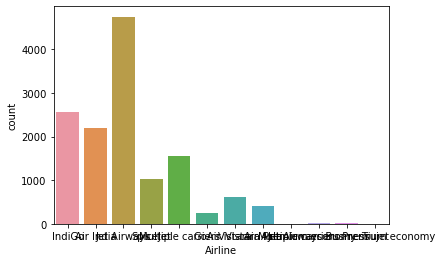

In [17]:
sns.countplot(flight['Airline'])

<AxesSubplot:xlabel='Date_of_Journey', ylabel='count'>

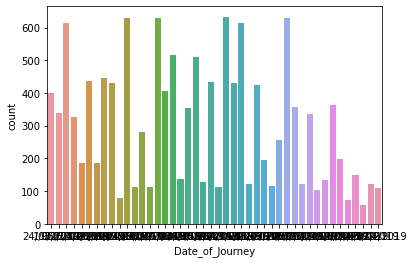

In [18]:
sns.countplot(flight['Date_of_Journey'])

<AxesSubplot:xlabel='Source', ylabel='count'>

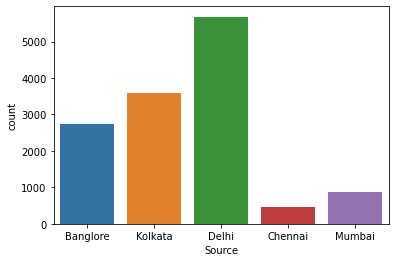

In [19]:
sns.countplot(flight['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

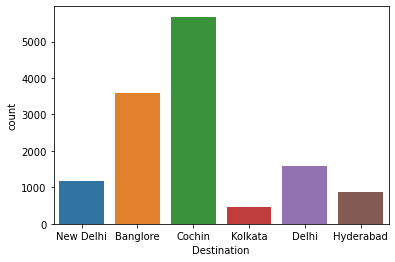

In [20]:
sns.countplot(flight['Destination'])

<AxesSubplot:xlabel='Route', ylabel='count'>

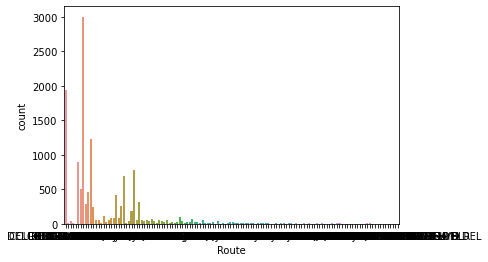

In [21]:
sns.countplot(flight['Route'])

<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

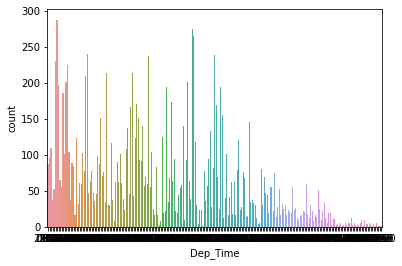

In [22]:
sns.countplot(flight['Dep_Time'])

<AxesSubplot:xlabel='Arrival_Time', ylabel='count'>

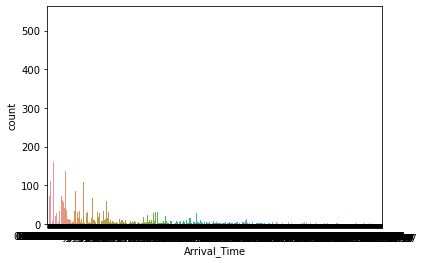

In [23]:
sns.countplot(flight['Arrival_Time'])

<AxesSubplot:xlabel='Duration', ylabel='count'>

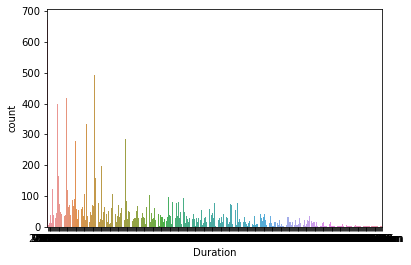

In [24]:
sns.countplot(flight['Duration'])

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

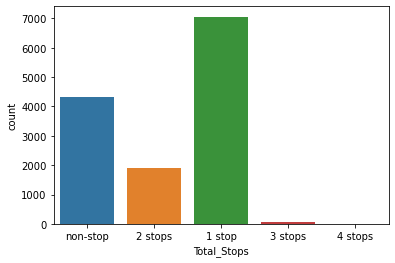

In [25]:
sns.countplot(flight['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

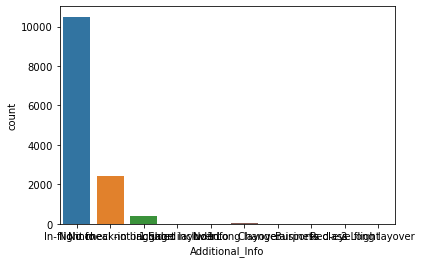

In [27]:
sns.countplot(flight['Additional_Info'])

<AxesSubplot:xlabel='Price', ylabel='count'>

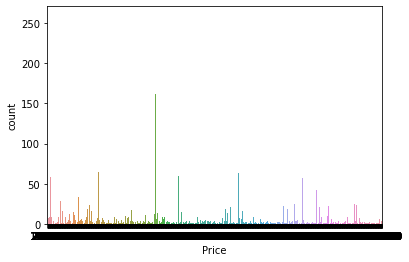

In [28]:
sns.countplot(flight['Price'])

# Normal Distribution Curve:

<AxesSubplot:xlabel='Airline', ylabel='Density'>

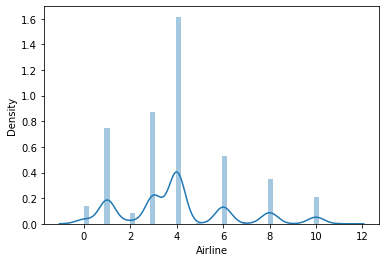

In [36]:
sns.distplot(flight["Airline"])

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Density'>

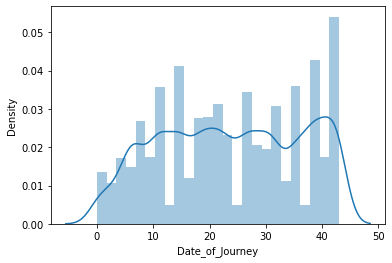

In [37]:
sns.distplot(flight["Date_of_Journey"])

<AxesSubplot:xlabel='Source', ylabel='Density'>

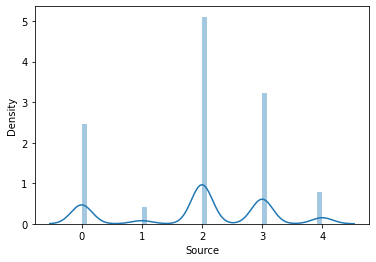

In [38]:
sns.distplot(flight["Source"])

<AxesSubplot:xlabel='Destination', ylabel='Density'>

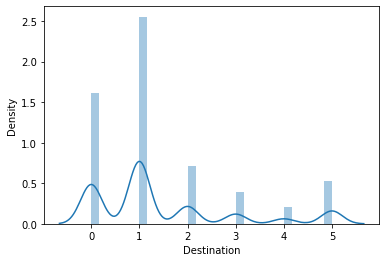

In [39]:
sns.distplot(flight["Destination"])

<AxesSubplot:xlabel='Route', ylabel='Density'>

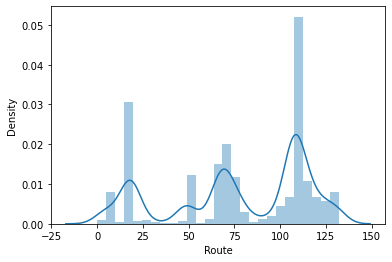

In [40]:
sns.distplot(flight["Route"])

<AxesSubplot:xlabel='Dep_Time', ylabel='Density'>

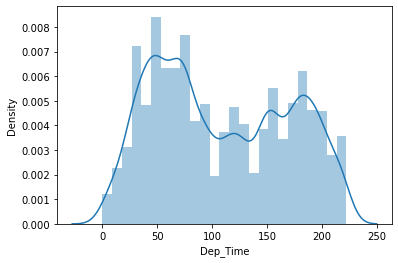

In [41]:
sns.distplot(flight["Dep_Time"])

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

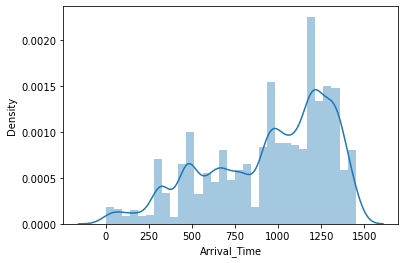

In [42]:
sns.distplot(flight["Arrival_Time"])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

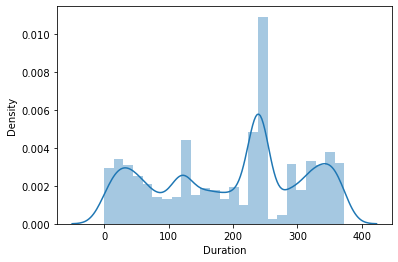

In [43]:
sns.distplot(flight["Duration"])

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

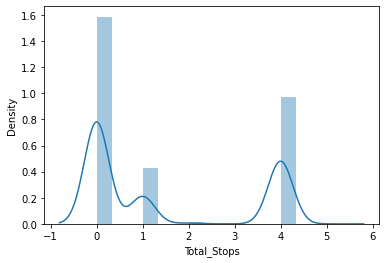

In [44]:
sns.distplot(flight["Total_Stops"])

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

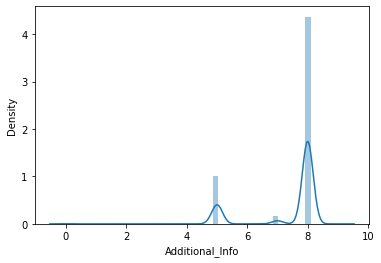

In [45]:
sns.distplot(flight["Additional_Info"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

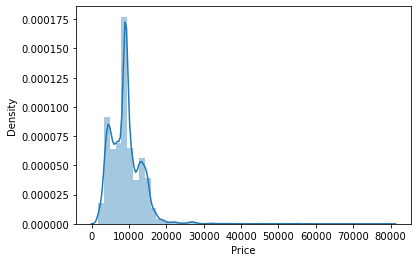

In [46]:
sns.distplot(flight["Price"])

The columns of the dataset are not normally distributed.The building blocks are outside the normalized curve.

# Correlation:

In [47]:
flight.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.021171,-0.018547,0.022130,0.020447,-0.030363,-0.018385,0.028354,0.037978,-0.058533,-0.035170
Date_of_Journey,0.021171,1.000000,0.163327,-0.270748,0.270308,-0.011017,-0.011680,-0.002389,-0.043478,0.013295,-0.032936
Source,-0.018547,0.163327,1.000000,-0.589710,0.410124,0.054033,0.016779,-0.185234,-0.223059,-0.022219,0.014292
Destination,0.022130,-0.270748,-0.589710,1.000000,-0.475881,-0.058119,-0.029959,0.012843,0.336460,0.027398,-0.063664
Route,0.020447,0.270308,0.410124,-0.475881,1.000000,-0.090364,0.009594,-0.057312,-0.447204,0.036037,0.149263
Dep_Time,-0.030363,-0.011017,0.054033,-0.058119,-0.090364,1.000000,-0.029682,0.046499,0.051578,-0.056115,0.002693
Arrival_Time,-0.018385,-0.011680,0.016779,-0.029959,0.009594,-0.029682,1.000000,0.032591,-0.099455,0.012747,0.025561
Duration,0.028354,-0.002389,-0.185234,0.012843,-0.057312,0.046499,0.032591,1.000000,0.168697,0.074230,-0.125702
Total_Stops,0.037978,-0.043478,-0.223059,0.336460,-0.447204,0.051578,-0.099455,0.168697,1.000000,0.162122,-0.511483
Additional_Info,-0.058533,0.013295,-0.022219,0.027398,0.036037,-0.056115,0.012747,0.074230,0.162122,1.000000,-0.059337


Correlation using heatmap

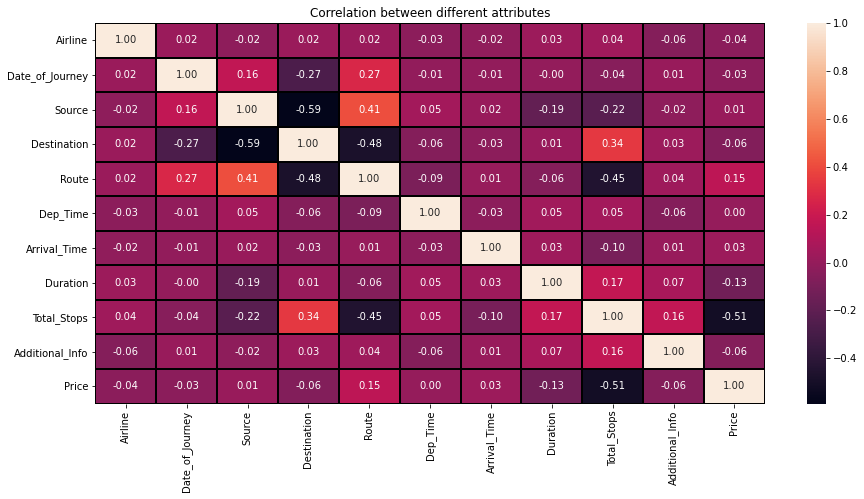

In [49]:
plt.figure(figsize=(15,7))
sns.heatmap(flight.corr(),annot=True,linewidth=1,linecolor='black',fmt='.2f')
plt.title("Correlation between different attributes")
plt.show()

Outcome of Correlation

Column Airline is 4% negatively correlated with the target column price.
Column Date_of_Journey is 3% negatively correlated with the target column price.
Column Source is 1% correlated with the target column price.
Column Destination is 6% negatively correlated with the target column price.
Column Route is 15% correlated with the target column price.
Column Dep_Time is 0% correlated with the target column price.
Column Arrival_Time is 3% correlated with the target column price.
Column Duration is 13% negatively correlated with the target column price.
Column Total_Stops is 51% negatively correlated with the target column price.
Column Additional_Info is 6% negatively correlated with the target column price.

Max.Correlation:Total_Stops
    
Min.Correlation:Source
    
No Correlation:Dep_Time

# Describe of Dataset

In [50]:
flight.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,23.720608,1.954096,1.435450,77.439494,108.254381,947.215216,195.868129,1.451400,7.407743,9087.064121
std,2.363997,12.377232,1.178607,1.473368,38.257148,61.034880,352.515953,111.141733,1.804389,1.198393,4124.447805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,49.000000,55.000000,671.000000,103.000000,0.000000,8.000000,6135.250000
50%,4.000000,24.000000,2.000000,1.000000,76.000000,97.000000,1020.000000,235.000000,0.000000,8.000000,9087.064121
75%,4.000000,35.000000,3.000000,2.000000,108.000000,164.000000,1233.000000,284.000000,4.000000,8.000000,11087.000000
max,11.000000,43.000000,4.000000,5.000000,132.000000,222.000000,1450.000000,373.000000,5.000000,9.000000,79512.000000


Describe of dataset using heatmap

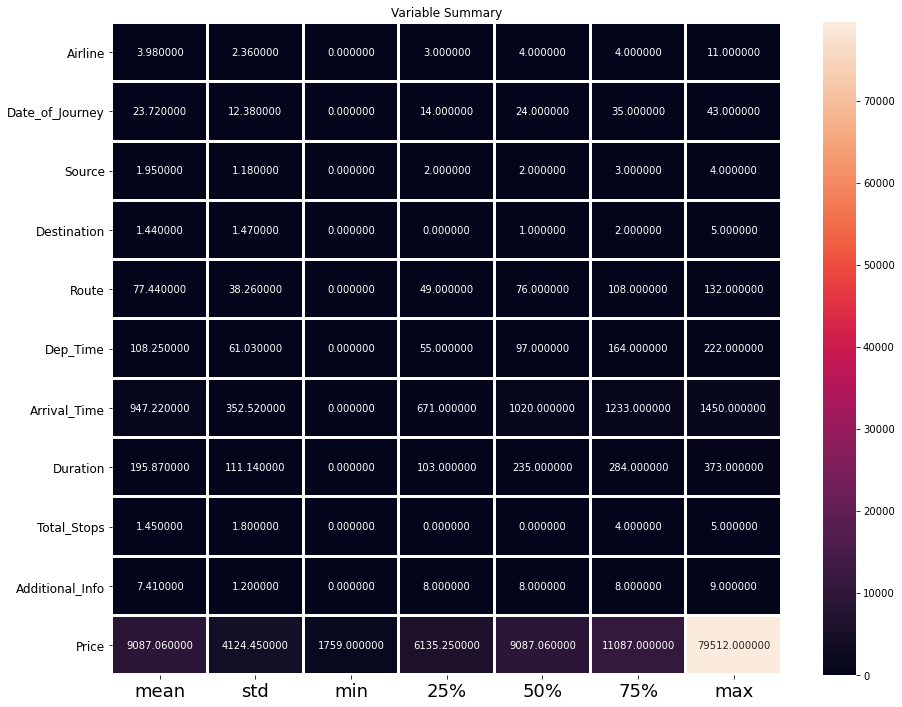

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(round(flight.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outcome of Describe of datasets:

In [53]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int64  
 1   Date_of_Journey  13354 non-null  int64  
 2   Source           13354 non-null  int64  
 3   Destination      13354 non-null  int64  
 4   Route            13354 non-null  int64  
 5   Dep_Time         13354 non-null  int64  
 6   Arrival_Time     13354 non-null  int64  
 7   Duration         13354 non-null  int64  
 8   Total_Stops      13354 non-null  int64  
 9   Additional_Info  13354 non-null  int64  
 10  Price            13354 non-null  float64
 11  source           13354 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 1.2+ MB


# Outliers Checking

<AxesSubplot:xlabel='Airline'>

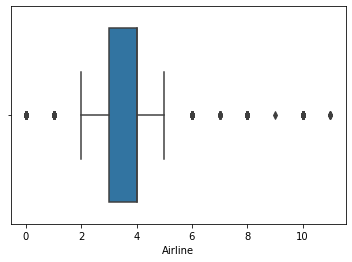

In [54]:
sns.boxplot(flight['Airline'])

<AxesSubplot:xlabel='Date_of_Journey'>

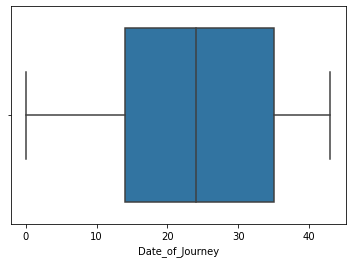

In [55]:
sns.boxplot(flight['Date_of_Journey'])

<AxesSubplot:xlabel='Source'>

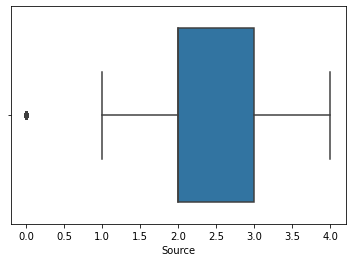

In [56]:
sns.boxplot(flight['Source'])

<AxesSubplot:xlabel='Destination'>

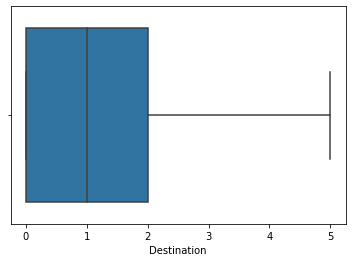

In [57]:
sns.boxplot(flight['Destination'])

<AxesSubplot:xlabel='Route'>

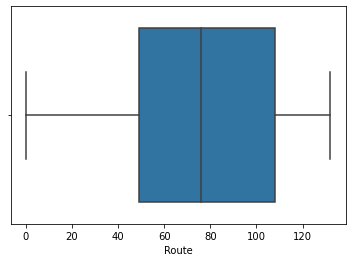

In [58]:
sns.boxplot(flight['Route'])

<AxesSubplot:xlabel='Dep_Time'>

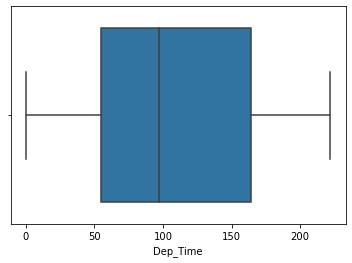

In [59]:
sns.boxplot(flight['Dep_Time'])

<AxesSubplot:xlabel='Arrival_Time'>

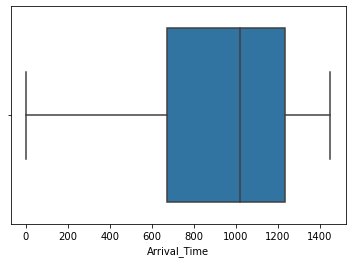

In [60]:
sns.boxplot(flight['Arrival_Time'])

<AxesSubplot:xlabel='Duration'>

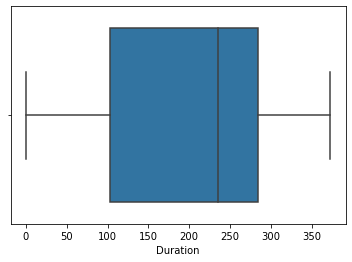

In [61]:
sns.boxplot(flight['Duration'])

<AxesSubplot:xlabel='Total_Stops'>

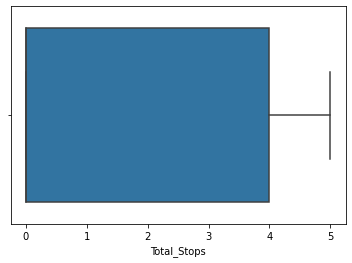

In [62]:
sns.boxplot(flight['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info'>

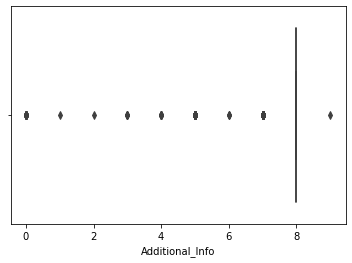

In [63]:
sns.boxplot(flight['Additional_Info'])

<AxesSubplot:xlabel='Price'>

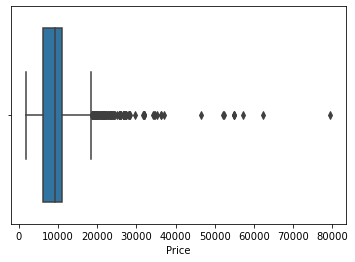

In [64]:
sns.boxplot(flight['Price'])

columns[additional_Info,Price] has more outliers,columns[Airline,Source] has less outliers and columns[Date_of_Journey,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops] has no outliers.

# Skewness:

In [65]:
flight.skew()

Airline            0.720924
Date_of_Journey   -0.065428
Source            -0.424151
Destination        1.247893
Route             -0.521328
Dep_Time           0.193459
Arrival_Time      -0.650988
Duration          -0.192160
Total_Stops        0.639492
Additional_Info   -1.784752
Price              2.026457
dtype: float64

Outcome of skewness

# Data Cleaning:

In [66]:
flight=flight.drop(["Dep_Time"],axis=1)

In [67]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,3,24,0,5,18,264,242,4,8,3897.000000,train
1,1,6,3,0,87,986,342,1,8,7662.000000,train
2,4,43,2,1,122,468,106,1,8,13882.000000,train
3,3,10,3,0,95,1430,317,0,8,6218.000000,train
4,3,0,0,5,29,1331,309,0,8,13302.000000,train
...,...,...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,1283,168,0,8,9087.064121,test
13350,3,28,3,0,67,1097,239,4,8,9087.064121,test
13351,4,36,2,1,108,464,332,0,8,9087.064121,test
13352,1,36,2,1,108,1212,62,0,8,9087.064121,test


In [68]:
train=flight.loc[flight['source']=='train']
test=flight.loc[flight['source']=='test']

In [69]:
train=train.drop(["source"],axis=1)

In [70]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,264,242,4,8,3897.0
1,1,6,3,0,87,986,342,1,8,7662.0
2,4,43,2,1,122,468,106,1,8,13882.0
3,3,10,3,0,95,1430,317,0,8,6218.0
4,3,0,0,5,29,1331,309,0,8,13302.0
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,67,1353,238,4,8,4107.0
10679,1,29,3,0,67,1408,239,4,8,4145.0
10680,4,29,0,2,18,901,284,4,8,7229.0
10681,10,0,0,5,18,1019,240,4,8,12648.0


In [72]:
test=test.drop(["source","Price"],axis=1)

In [73]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info
10683,4,39,2,1,108,463,10,0,8
10684,3,10,3,0,94,809,301,0,8
10685,4,22,2,1,108,1193,166,0,5
10686,6,22,2,1,108,1308,36,0,8
10687,0,27,0,2,18,424,242,4,8
...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,1283,168,0,8
13350,3,28,3,0,67,1097,239,4,8
13351,4,36,2,1,108,464,332,0,8
13352,1,36,2,1,108,1212,62,0,8


In [74]:
flight=flight.drop(["source"],axis=1)
flight

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,264,242,4,8,3897.000000
1,1,6,3,0,87,986,342,1,8,7662.000000
2,4,43,2,1,122,468,106,1,8,13882.000000
3,3,10,3,0,95,1430,317,0,8,6218.000000
4,3,0,0,5,29,1331,309,0,8,13302.000000
...,...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,1283,168,0,8,9087.064121
13350,3,28,3,0,67,1097,239,4,8,9087.064121
13351,4,36,2,1,108,464,332,0,8,9087.064121
13352,1,36,2,1,108,1212,62,0,8,9087.064121


# Removing Outliers:

# z-Score Technique

In [75]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(flight))
z.shape

(13354, 10)

In [76]:
threshold=3
print(np.where(z>3))

(array([    7,   123,   396,   486,   510,   515,   597,   628,   657,
         785,   785,   826,   936,   946,   959,   975,  1043,  1196,
        1246,  1341,  1424,  1466,  1478,  1629,  1654,  1785,  1824,
        1828,  1918,  2055,  2079,  2099,  2108,  2127,  2405,  2405,
        2481,  2495,  2495,  2556,  2556,  2591,  2618,  2633,  2635,
        2691,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3317,  3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,
        4676,  4765,  4829,  5013,  5013,  5136,  5162,  5293,  5372,
        5372,  5439,  5523,  5628,  5662,  5701,  5710,  5719,  5738,
        5745,  5850,  5856,  5980,  5986,  6024,  6314,  6336,  6407,
        6526,  6576,  6576,  6588,  6605,  6901,  6991,  7120,  7351,
        7356,  7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,
        7902,  8020,  8080,  8451,  8470,  8536,  8598,  8856,  8912,
        8940,  8957,  8957,  8987,  8990,  9019,  9019,  9044,  9055,
        9193,  9239

In [77]:
flight_new=flight[(z<3).all(axis=1)]
print(flight.shape)
print(flight_new.shape)

(13354, 10)
(13218, 10)


Percentage Data Loss

In [78]:
percentage_loss=(13354-13218)/13354*100
print(percentage_loss)

1.0184214467575259


# IQR Technique:

In [79]:
Q1 = flight.quantile(0.25)
Q3 = flight.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Airline               1.00
Date_of_Journey      21.00
Source                1.00
Destination           2.00
Route                59.00
Arrival_Time        562.00
Duration            181.00
Total_Stops           4.00
Additional_Info       0.00
Price              4951.75
dtype: float64


In [80]:
flight_new1= flight[~((flight < (Q1 - 1.5 * IQR)) |(flight > (Q3 + 1.5 * IQR))).any(axis=1)]
print(flight.shape)
print(flight_new1.shape)

(13354, 10)
(3866, 10)


Percentage Data Loss

In [81]:
percentage_loss=((13354-3866)/13354)*100
print(percentage_loss)

71.04987269731916


The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing Data in features and vector:

In [82]:
x_train=train
y_train=train['Price']
x_test=test

# Transform data to remove skewness

In [83]:
from sklearn.preprocessing import power_transform
x_train=power_transform(x_train,method='yeo-johnson')

In [84]:
x_train

array([[-0.29549976,  0.07283158, -1.59971174, ...,  1.29335859,
         0.52470319, -1.36790521],
       [-1.42029981, -1.48152376,  0.90206079, ...,  0.35515174,
         0.52470319, -0.1389652 ],
       [ 0.14774467,  1.48488887, -0.01210752, ...,  0.35515174,
         0.52470319,  1.08622799],
       ...,
       [ 0.14774467,  0.4591451 , -1.59971174, ...,  1.29335859,
         0.52470319, -0.25130962],
       [ 2.12289614, -2.15725197, -1.59971174, ...,  1.29335859,
         0.52470319,  0.8846493 ],
       [-1.42029981,  1.41384392, -0.01210752, ...,  0.35515174,
         0.52470319,  0.72833732]])

Standard Scaler:

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[-0.29549976,  0.07283158, -1.59971174, ...,  1.29335859,
         0.52470319, -1.36790521],
       [-1.42029981, -1.48152376,  0.90206079, ...,  0.35515174,
         0.52470319, -0.1389652 ],
       [ 0.14774467,  1.48488887, -0.01210752, ...,  0.35515174,
         0.52470319,  1.08622799],
       ...,
       [ 0.14774467,  0.4591451 , -1.59971174, ...,  1.29335859,
         0.52470319, -0.25130962],
       [ 2.12289614, -2.15725197, -1.59971174, ...,  1.29335859,
         0.52470319,  0.8846493 ],
       [-1.42029981,  1.41384392, -0.01210752, ...,  0.35515174,
         0.52470319,  0.72833732]])

# MODEL BUILDING:

# Linear Regression:

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.20,random_state=75)

In [89]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [90]:
lr_pred=lr.predict(xtest)
lr_pred

array([15341.13639243,  2381.73041864, 15747.47756874, ...,
       12980.20187411, 13337.50162359,  9102.05383948])

In [91]:
print('r2_score:',r2_score(ytest,lr_pred)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,lr_pred))
print('Mean Squared Error:',mean_squared_error(ytest,lr_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,lr_pred)))

r2_score: 91.80639471033483
Mean Absolute Error: 637.3724339185584
Mean Squared Error: 1823549.8226210275
Root Mean Square Error: 1350.3887672152148


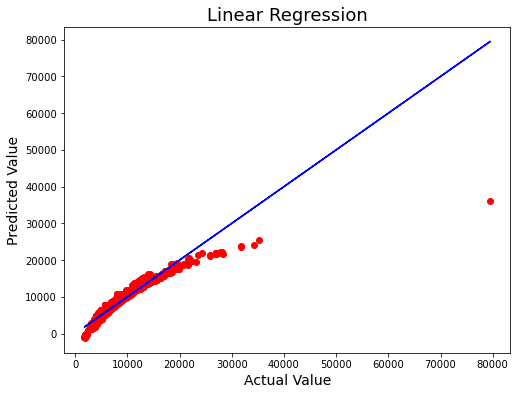

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=lr_pred, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# 1.Lasso:

In [94]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [95]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_train,y_train,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 93.06954851271415
R2_score is :- 91.80533625486676


At cv:- 3
Cross validation score is:- 93.06226931945925
R2_score is :- 91.80533625486676


At cv:- 4
Cross validation score is:- 93.06320005140843
R2_score is :- 91.80533625486676


At cv:- 5
Cross validation score is:- 93.0838595284218
R2_score is :- 91.80533625486676


At cv:- 6
Cross validation score is:- 93.17593200631433
R2_score is :- 91.80533625486676


At cv:- 7
Cross validation score is:- 93.24554799718861
R2_score is :- 91.80533625486676


At cv:- 8
Cross validation score is:- 93.18682959508835
R2_score is :- 91.80533625486676


At cv:- 9
Cross validation score is:- 93.27865177439126
R2_score is :- 91.80533625486676




In [96]:
print("At cv:",3)
print("Cross validation score is:",93.06226931945925)
print("R2_Score is:",91.80533625486676)

At cv: 3
Cross validation score is: 93.06226931945925
R2_Score is: 91.80533625486676


In [97]:
print('r2_score:',r2_score(ytest,pred_ls)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

r2_score: 91.80533625486676
Mean Absolute Error: 637.0540747583436
Mean Squared Error: 1823785.3900193605
Root Mean Square Error: 1350.475986465276


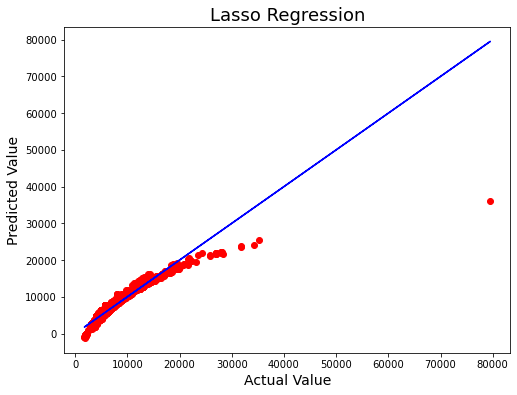

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2.Ridge:

In [99]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [100]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)

rds = r2_score(ytest,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,xtrain,ytrain,cv=3)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 91.8038462577712
Cross Val Score: 93.41185241793232


In [101]:
print('r2_score:',r2_score(ytest,pred_rd)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

r2_score: 91.8038462577712
Mean Absolute Error: 636.2117133944905
Mean Squared Error: 1824117.0003231608
Root Mean Square Error: 1350.5987562274595


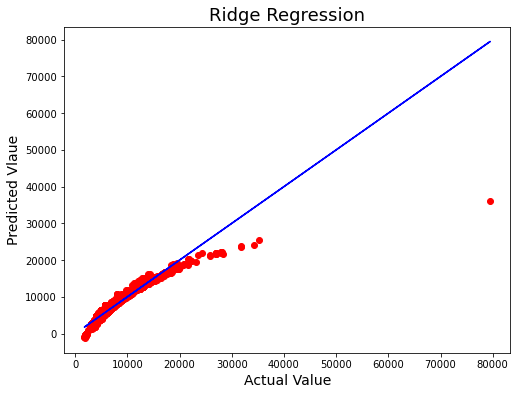

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Approaching more Regressors:

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

# 1.Decision Tree Regressor:

In [104]:
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(xtrain,ytrain)
dtr.score(xtrain,ytrain)
pred_dtr = dtr.predict(xtest)

dtr_r2 = r2_score(ytest,pred_dtr)
print('R2 Score:',dtr_r2*100)

dtrscore = cross_val_score(dtr,x_train,y_train,cv=3)
dtrcc = dtrscore.mean() 
print('Cross Val Score:',dtrcc*100)

R2 Score: 99.38434760233888
Cross Val Score: 99.73258962664842


In [105]:
print('r2_score:',r2_score(ytest,pred_dtr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_dtr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_dtr)))

r2_score: 99.38434760233888
Mean Absolute Error: 10.425830603649977
Mean Squared Error: 137018.17220402433
Root Mean Square Error: 370.15965772086014


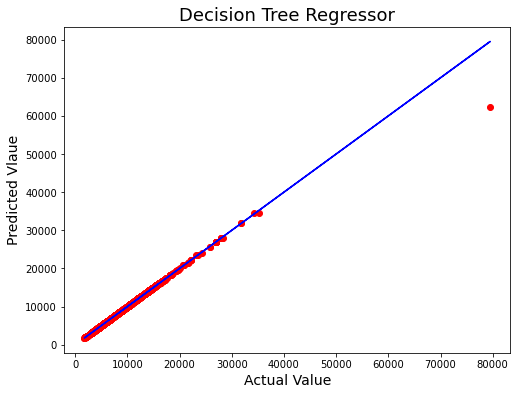

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_dtr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

All the points lie on the best fit line.

# 2.KNeighbors Regressor

In [107]:
knr=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
knr.fit(xtrain,ytrain)
knr.score(xtrain,ytrain)
pred_knr = knr.predict(xtest)

knr_r2 = r2_score(ytest,pred_knr)
print('R2 Score:',knr_r2*100)

knrscore = cross_val_score(knr,x_train,y_train,cv=3)
knrcc = knrscore.mean() 
print('Cross Val Score:',knrcc*100)

R2 Score: 95.27541206394895
Cross Val Score: 93.10729756786338


In [108]:
print('r2_score:',r2_score(ytest,pred_knr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_knr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_knr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_knr)))

r2_score: 95.27541206394895
Mean Absolute Error: 507.2226485727655
Mean Squared Error: 1051493.3522133834
Root Mean Square Error: 1025.4234989570814


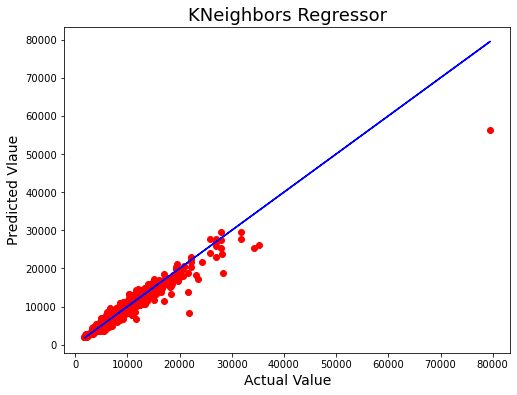

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_knr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

# 3.SVR:

In [110]:
svr=SVR()
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_svr = svr.predict(xtest)

svr_r2 = r2_score(ytest,pred_svr)
print('R2 Score:',svr_r2*100)

svr_score = cross_val_score(svr,x_train,y_train,cv=3)
svr_cc = svr_score.mean() 
print('Cross Val Score:',svr_cc*100)

R2 Score: 9.419374801082824
Cross Val Score: 7.6325966137217245


In [111]:
print('r2_score:',r2_score(ytest,pred_svr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_svr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_svr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_svr)))

r2_score: 9.419374801082824
Mean Absolute Error: 3309.0332554091883
Mean Squared Error: 20159414.223032106
Root Mean Square Error: 4489.923632204907


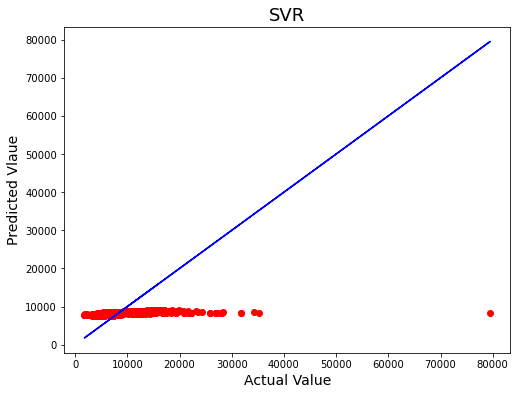

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_svr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SVR',fontsize=18)
plt.show()

# 4:SGD Regressor:

In [113]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
sgd.score(xtrain,ytrain)
pred_sgd = sgd.predict(xtest)

sgd_r2 = r2_score(ytest,pred_sgd)
print('R2 Score:',sgd_r2*100)

sgd_score = cross_val_score(sgd,x_train,y_train,cv=3)
sgd_cc = sgd_score.mean() 
print('Cross Val Score:',sgd_cc*100)

R2 Score: 91.65822015464396
Cross Val Score: 93.06934672182122


In [114]:
print('r2_score:',r2_score(ytest,pred_sgd)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_sgd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_sgd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_sgd)))

r2_score: 91.65822015464396
Mean Absolute Error: 617.6337089904633
Mean Squared Error: 1856527.208667174
Root Mean Square Error: 1362.5443877786786


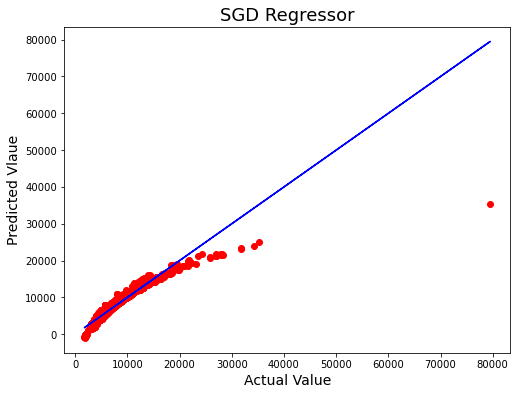

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_sgd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SGD Regressor',fontsize=18)
plt.show()

# Ensemble Methods:

# 1.Random Forest Regressor:

In [116]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_rf = rf.predict(xtest)

rf_r2 = r2_score(ytest,pred_rf)
print('R2 Score:',rf_r2*100)

rf_score = cross_val_score(rf,x_train,y_train,cv=3)
rf_cc = rf_score.mean() 
print('Cross Val Score:',rf_cc*100)

R2 Score: 99.13523523310816
Cross Val Score: 99.765248065453


In [117]:
print('r2_score:',r2_score(ytest,pred_rf)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rf))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rf))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rf)))

r2_score: 99.13523523310816
Mean Absolute Error: 11.490182498830144
Mean Squared Error: 192460.04433036968
Root Mean Square Error: 438.7026832951557


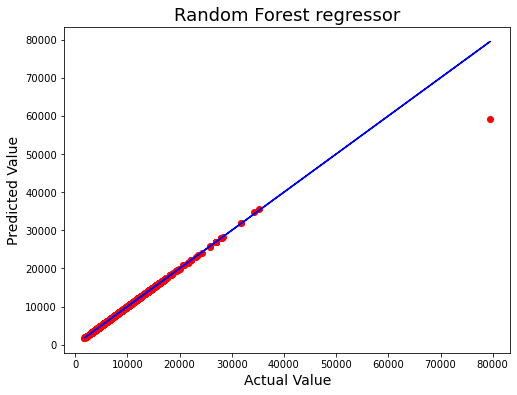

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rf, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

All the data points lie on the best fit line.

# 2.ADA Boost Regressor:

In [119]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50)
ada.fit(xtrain,ytrain)
ada.score(xtrain,ytrain)
pred_ada = ada.predict(xtest)

ada_r2 = r2_score(ytest,pred_ada)
print('R2 Score:',ada_r2*100)

ada_score = cross_val_score(ada,x_train,y_train,cv=3)
ada_cc = ada_score.mean() 
print('Cross Val Score:',ada_cc*100)

R2 Score: 98.0304630697324
Cross Val Score: 98.04737394150696


In [120]:
print('r2_score:',r2_score(ytest,pred_ada)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ada))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ada)))

r2_score: 98.0304630697324
Mean Absolute Error: 373.7935216157569
Mean Squared Error: 438335.57913329685
Root Mean Square Error: 662.0691649165492


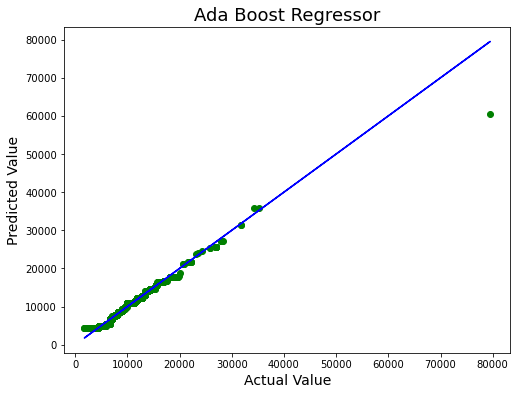

In [121]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ada, color='g')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Ada Boost Regressor',fontsize=18)
plt.show()

# 3.Gradient Boosting Regressor:

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gbr =gbr.predict(xtest)

gbrs= r2_score(ytest,pred_gbr)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x_train,y_train,cv=3)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 99.03504530320527
Cross Val Score: 99.80199910956277


In [123]:
print('r2_score:',r2_score(ytest,pred_gbr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gbr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gbr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gbr)))

r2_score: 99.03504530320527
Mean Absolute Error: 30.877898307977066
Mean Squared Error: 214758.0831599073
Root Mean Square Error: 463.419985714802


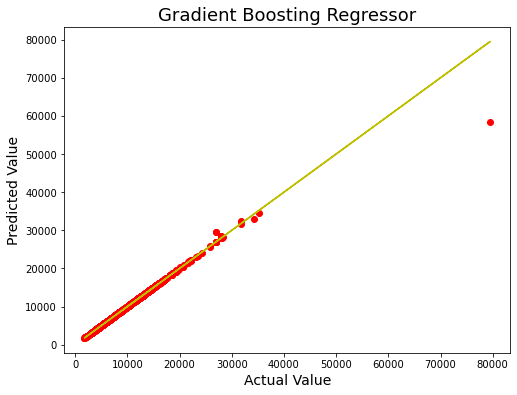

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gbr, color='r')
plt.plot(ytest,ytest, color='y')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

# The best model is AdaBoost Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving:

In [131]:
import pickle
filename = 'flight_price.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [132]:
import numpy as np
a=np.array(ytest)
a

array([15764.,  3573., 16389., ..., 12273., 12797.,  8452.])

In [133]:
predicted=np.array(rf.predict(xtest))
predicted

array([15764.48,  3573.  , 16380.8 , ..., 12273.69, 12804.33,  8452.  ])

In [134]:
flight_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
flight_com

,original,predicted
0,15764.0,15764.48
1,3573.0,3573.00
2,16389.0,16380.80
3,4668.0,4668.00
4,4077.0,4077.00
...,...,...
2132,16704.0,16704.00
2133,18581.0,18567.28
2134,12273.0,12273.69
2135,12797.0,12804.33


# From the above table, the model is predicted with 99% percent accuracy.